# Machine Learning Course (RPU) - Assigment 2 - 22101128

# Importing Important Libraries

In [196]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import OrdinalEncoder

# Accessing the Dataframe

In [197]:
df = pd.read_excel('insurance.xlsx')

# Data Analysis

In [198]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [200]:
df.isnull()

,age,gender,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [201]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Measures of Central Tendency

In [202]:
df.bmi.mean()

30.66339686098655

In [203]:
df.charges.median()

9382.033

In [204]:
df.region.mode()

0    southeast
Name: region, dtype: object

In [205]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# HistPlot

<Axes: ylabel='Count'>

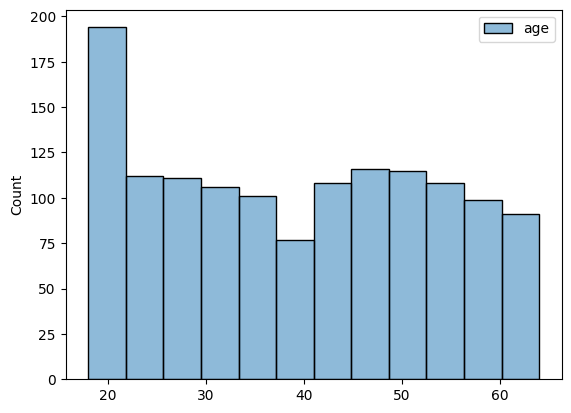

In [206]:
sns.histplot(df[["age"]])

<Axes: ylabel='Count'>

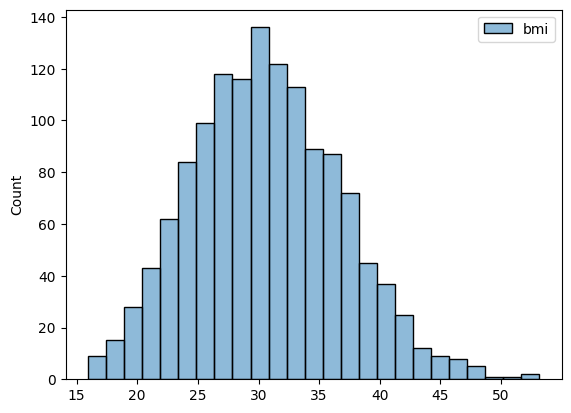

In [207]:
sns.histplot(df[["bmi"]])

<Axes: ylabel='Count'>

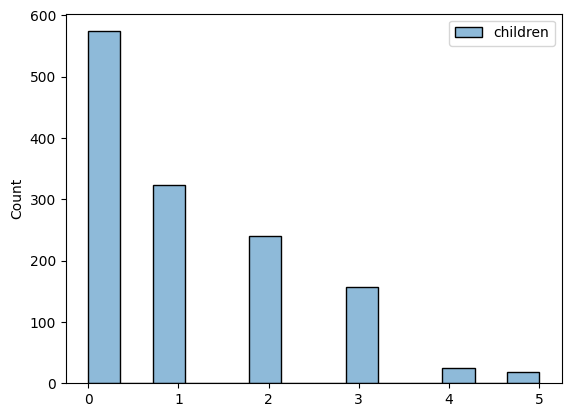

In [208]:
sns.histplot(df[["children"]])

<Axes: ylabel='Count'>

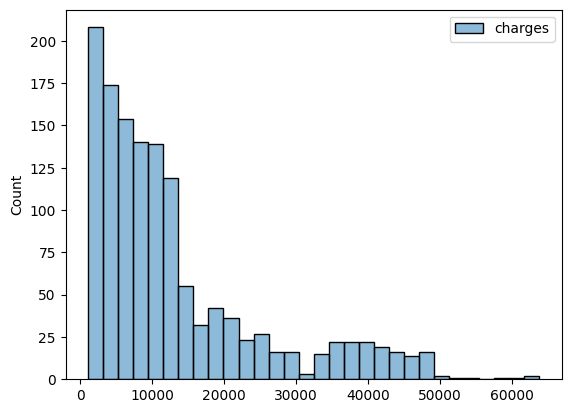

In [209]:
sns.histplot(df[["charges"]])

# Heat Map

In [210]:
df.drop(["gender", "smoker", "region"], axis=1, inplace=True)

In [211]:
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [212]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Making the Figure

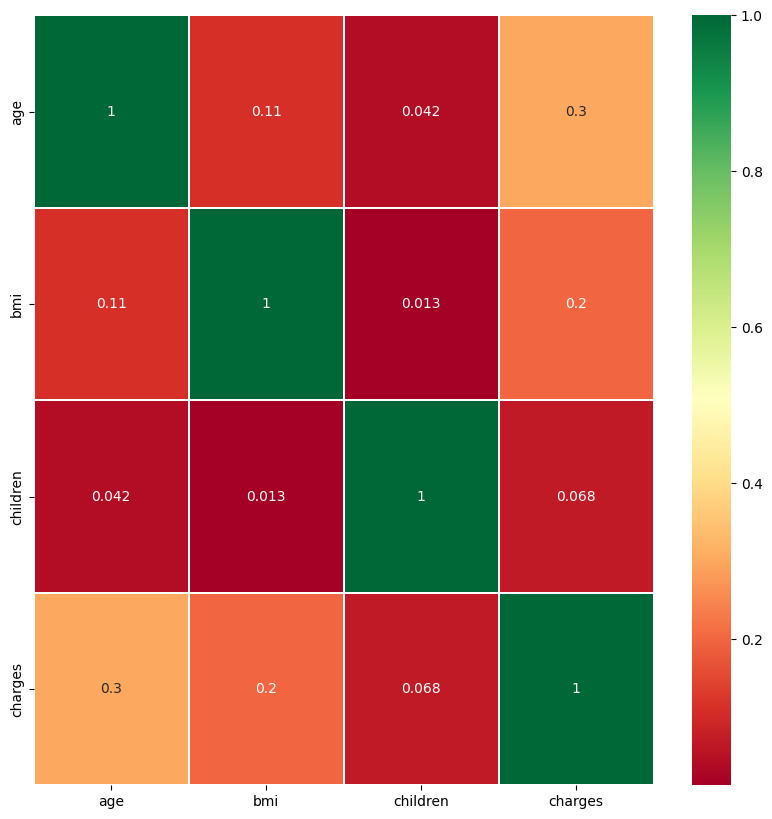

In [213]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10}, linewidths=0.1)
plt.savefig('SharifdotG.png')

# Handling the NAN Value (NAN == NULL)

In [214]:
df = pd.read_excel('insurance.xlsx')

In [215]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [216]:
df.isnull()

,age,gender,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


# Encoding

In [217]:
cols = df.select_dtypes(include = 'object').columns
cols

Index(['gender', 'smoker', 'region'], dtype='object')

### Using Replace Method

In [218]:
df1 = df.copy()

In [219]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [220]:
for column in cols:
    unique = df1[column].unique()
    n = len(unique)
    replace = np.arange(n)
    df1[column] = df1[column].replace(unique, replace)

In [221]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


### Using Label Encoder

In [222]:
df2 = df.copy()

In [223]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [224]:
for column in cols:
    df2[column] = le.fit_transform(df2[column])

In [225]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Using Ordinal Encoder

In [226]:
df3 = df.copy()

In [227]:
df3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [228]:
for column in cols:
    ode = OrdinalEncoder(categories = [df3[column].unique()])
    df3[column] = ode.fit_transform(df3[[column]])

In [229]:
df3.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,0.0,0.0,16884.92400
1,18,1.0,33.770,1,1.0,1.0,1725.55230
2,28,1.0,33.000,3,1.0,1.0,4449.46200
3,33,1.0,22.705,0,1.0,2.0,21984.47061
4,32,1.0,28.880,0,1.0,2.0,3866.85520


### Using One Hot/Dummy Encoder

In [230]:
df4 = df.copy()

In [231]:
df4.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [232]:
for column in cols:
    dummy = pd.get_dummies(df4[column], prefix = column, drop_first = True, dtype = int)
    df4 = pd.concat([df4, dummy], axis = 1).drop(column, axis = 1)

In [233]:
df4.head()

,age,bmi,children,charges,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Correlation

In [238]:
df3.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


<Axes: >

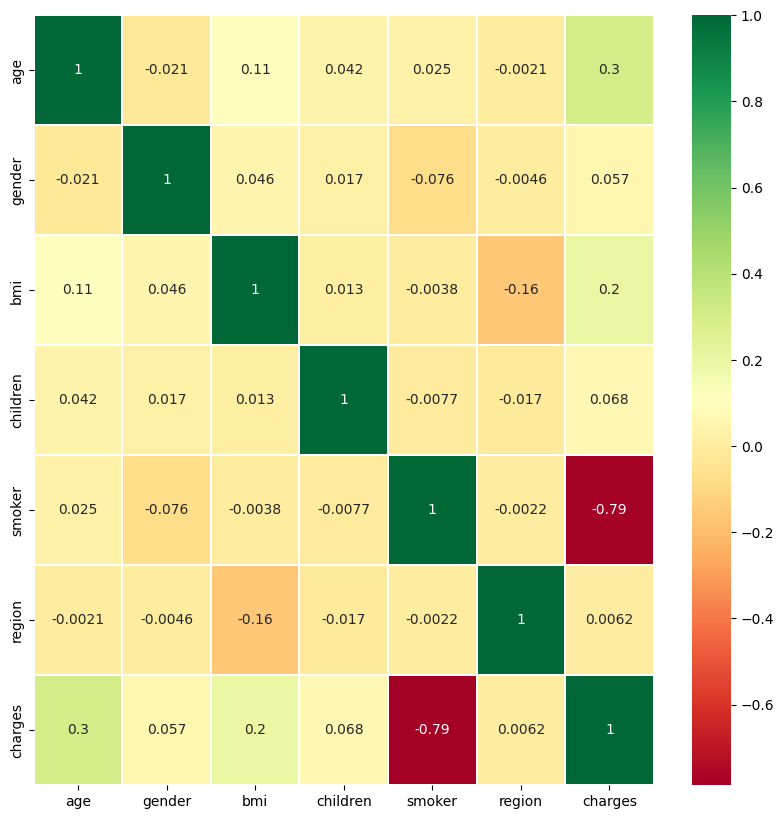

In [239]:
plt.figure(figsize=(10, 10))
sns.heatmap(df3.corr(), annot=True, cmap="RdYlGn", annot_kws={"size": 10}, linewidths=0.1)